# Abalone case study

In [8]:
#importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
#Reading the data

In [4]:
df= pd.read_csv('abalone.csv')

In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
#checking necessary info about the data

In [7]:
df.shape

(4177, 9)

In [15]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [16]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [11]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

all the columns are in float or integer except sex

In [17]:
#converting categorical data into numerical data by label encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Sex'].head()

0    2
1    2
2    0
3    2
4    1
Name: Sex, dtype: int64

In [22]:
#checking for null values by heatmap

<AxesSubplot:>

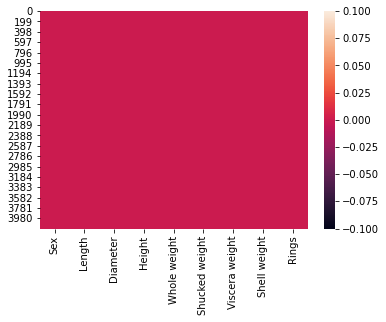

In [23]:
sns.heatmap(df.isnull())

there is no missing values 

In [24]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [27]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [28]:
#checking skewness by using box plot

In [32]:
df.columns


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

<AxesSubplot:>

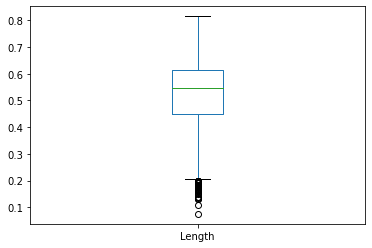

In [35]:
df['Length'].plot.box()

<AxesSubplot:>

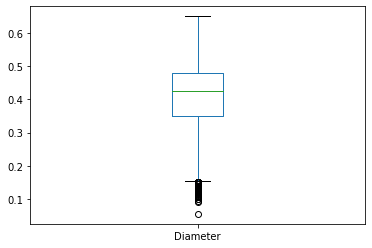

In [36]:
df['Diameter'].plot.box()

<AxesSubplot:>

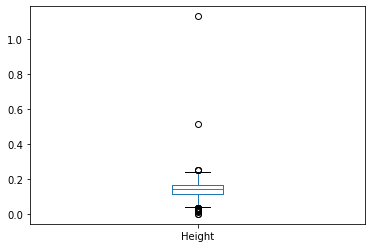

In [37]:
df['Height'].plot.box()

<AxesSubplot:>

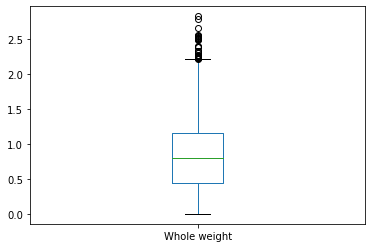

In [38]:
df['Whole weight'].plot.box()

<AxesSubplot:>

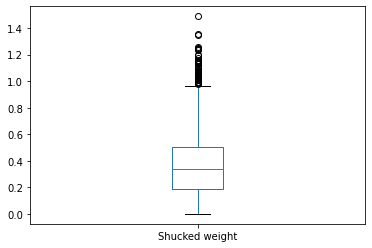

In [39]:
df['Shucked weight'].plot.box()

<AxesSubplot:>

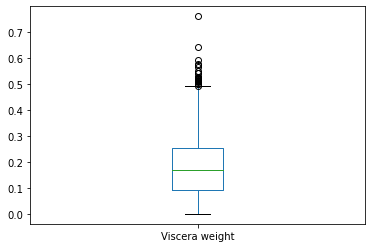

In [40]:
df['Viscera weight'].plot.box()

<AxesSubplot:>

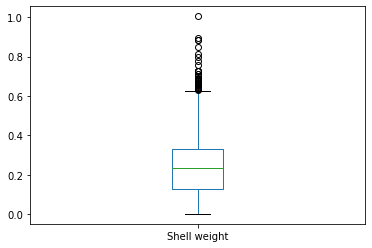

In [41]:
df['Shell weight'].plot.box()

<AxesSubplot:>

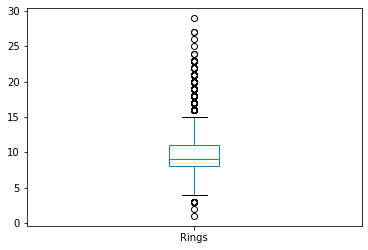

In [42]:
df['Rings'].plot.box()

from above figure, we can see outliers are present in every columns

In [43]:
#removing skewness by zscore

In [45]:
from scipy.stats import zscore

In [47]:
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]

In [50]:
df1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [52]:
#comparing the date before and after removing outliers

In [53]:
df.shape

(4177, 9)

In [54]:
df1.shape

(4027, 9)

In [55]:
#checking corelation

In [58]:
df1.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.043639,-0.046531,-0.046282,-0.034776,-0.016457,-0.045292,-0.043825,-0.033272
Length,-0.043639,1.000000,0.986011,0.895432,0.934410,0.909245,0.907957,0.914518,0.567074
Diameter,-0.046531,0.986011,1.000000,0.901803,0.934069,0.904302,0.904192,0.921779,0.584978
Height,-0.046282,0.895432,0.901803,1.000000,0.891783,0.843010,0.869273,0.899716,0.612540
Whole weight,-0.034776,0.934410,0.934069,0.891783,1.000000,0.971024,0.966612,0.961216,0.548295
Shucked weight,-0.016457,0.909245,0.904302,0.843010,0.971024,1.000000,0.930154,0.896220,0.440424
Viscera weight,-0.045292,0.907957,0.904192,0.869273,0.966612,0.930154,1.000000,0.919414,0.522917
Shell weight,-0.043825,0.914518,0.921779,0.899716,0.961216,0.896220,0.919414,1.000000,0.622872
Rings,-0.033272,0.567074,0.584978,0.612540,0.548295,0.440424,0.522917,0.622872,1.000000


<AxesSubplot:>

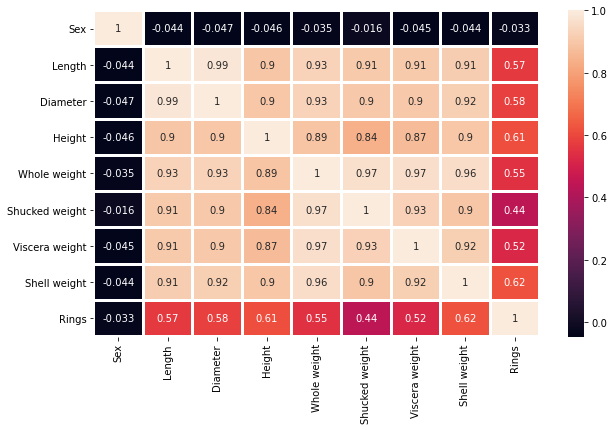

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True,linewidth=2)

In [61]:
#checking for multi colinearity 

In [62]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif['Variables']=x1.columns
    vif['vif Factor']=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return (vif)

In [64]:
calc_vif(df1)

,Variables,vif Factor
0,Sex,2.593801
1,Length,712.090638
2,Diameter,769.316084
3,Height,95.886537
4,Whole weight,452.654855
5,Shucked weight,123.306368
6,Viscera weight,66.409741
7,Shell weight,95.213440
8,Rings,25.293845


we can see that 'length','diameter'& 'whole weight' have high vif

In [65]:
#we can drop Length and Shucked weight since they have high vif and less corr with target

In [68]:
df2=df1.drop(['Length','Shucked weight'],axis=1)

In [69]:
df2

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


In [70]:
#splitting the data into x and y

In [74]:
x=df2.drop('Rings',axis=1)
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.095,0.5140,0.1010,0.1500
1,2,0.265,0.090,0.2255,0.0485,0.0700
2,0,0.420,0.135,0.6770,0.1415,0.2100
3,2,0.365,0.125,0.5160,0.1140,0.1550
4,1,0.255,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490
4173,2,0.440,0.135,0.9660,0.2145,0.2605
4174,2,0.475,0.205,1.1760,0.2875,0.3080
4175,0,0.485,0.150,1.0945,0.2610,0.2960


In [77]:
y= df2['Rings']
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

In [78]:
#Scaling the data 
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x=st.fit_transform(x)

In [79]:
#using Linear Regression model to test the data

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=700)

In [95]:
x_train.shape

(2818, 6)

In [96]:
y_train.shape

(2818,)

In [97]:
x_test.shape


(1209, 6)

In [98]:
y_test.shape

(1209,)

In [99]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [100]:
lr.coef_

array([ 0.03345421,  0.56094853,  0.97532403, -2.61457505,  0.04401597,
        2.86806208])

In [101]:
lr.intercept_

9.751410993984008

In [102]:
pred=lr.predict(x_test)
print('Score:', lr.score(x_train,y_train))

Score: 0.4503421647062834


In [103]:
#checking the score with other models

In [104]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
print('Score: ',svr.score(x_train,y_train))
print('Mean absolute Error: ',mean_absolute_error(y_test,predsvr))
print('Mean Squared Error: ',mean_squared_error(y_test,predsvr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predsvr)))
print('r2-score: ',r2_score(y_test,predsvr))

Score:  0.49656881782081197
Mean absolute Error:  1.4230709964644124
Mean Squared Error:  3.9888471988932395
Root Mean Squared Error:  1.9972098534939284
r2-score:  0.48215618437267016


In [105]:
svr1=SVR(kernel='poly')
svr1.fit(x_train,y_train)
predsvr1=svr1.predict(x_test)
print('Score: ',svr1.score(x_train,y_train))
print('Mean absolute Error: ',mean_absolute_error(y_test,predsvr1))
print('Mean Squared Error: ',mean_squared_error(y_test,predsvr1))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predsvr1)))
print('r2-score: ',r2_score(y_test,predsvr1))

Score:  0.3315412669309925
Mean absolute Error:  1.6113255513852076
Mean Squared Error:  5.076861797257096
Root Mean Squared Error:  2.2531892502089335
r2-score:  0.34090694543684286


In [106]:
svr2=SVR(kernel='linear')
svr2.fit(x_train,y_train)
predsvr2=svr2.predict(x_test)
print('Score: ',svr2.score(x_train,y_train))
print('Mean absolute Error: ',mean_absolute_error(y_test,predsvr2))
print('Mean Squared Error: ',mean_squared_error(y_test,predsvr2))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predsvr2)))
print('r2-score: ',r2_score(y_test,predsvr2))

Score:  0.42194882300821235
Mean absolute Error:  1.4808752862383068
Mean Squared Error:  4.368124856077552
Root Mean Squared Error:  2.090005946421577
r2-score:  0.43291724906499174


In [107]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
predknr=knr.predict(x_test)
print('Score: ',knr.score(x_train,y_train))
print('Mean absolute Error: ',mean_absolute_error(y_test,predknr))
print('Mean Squared Error: ',mean_squared_error(y_test,predknr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predknr)))
print('r2-score: ',r2_score(y_test,predknr))

Score:  0.6249276521485896
Mean absolute Error:  1.5574855252274606
Mean Squared Error:  4.533366418527709
Root Mean Squared Error:  2.12917035920748
r2-score:  0.41146510589361285


In [108]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
print('Score: ',dtr.score(x_train,y_train))
print('Mean absolute Error: ',mean_absolute_error(y_test,preddtr))
print('Mean Squared Error: ',mean_squared_error(y_test,preddtr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,preddtr)))
print('r2-score: ',r2_score(y_test,preddtr))

Score:  1.0
Mean absolute Error:  1.9909015715467329
Mean Squared Error:  7.643507030603804
Root Mean Squared Error:  2.764689319002011
r2-score:  0.007697550660642705


from decision tree model, score is 100%

In [109]:
#now save the model

In [111]:
import joblib
joblib.dump(df2,'Abalone.obj')

['Abalone.obj']